# 第 11  章  时间序列
时间序列（time series）数据是一种重要的结构化数据形式，应用于多个领
域，包括金融学、经济学、生态学、神经科学、物理学等。在多个时间点观察
或测量到的任何事物都可以形成一段时间序列。很多时间序列是固定频率的，
也就是说，数据点是根据某种规律定期出现的（比如每 15 秒、每 5 分钟、每月
出现一次）。时间序列也可以是不定期的，没有固定的时间单位或单位之间的
偏移量。时间序列数据的意义取决于具体的应用场景，主要有以下几种：
-  时间戳（timestamp），特定的时刻。
-  固定时期（period），如 2007 年 1 月或 2010 年全年。
-  时间间隔（interval），由起始和结束时间戳表示。时期（period）可以被看做间隔（interval）的特例。
-  实验或过程时间，每个时间点都是相对于特定起始时间的一个度量。例如，从放入烤箱时起，每秒钟饼干的直径。

本章主要讲解前 3 种时间序列。许多技术都可用于处理实验型时间序列，其索
引可能是一个整数或浮点数（表示从实验开始算起已经过去的时间）。最简单
也最常见的时间序列都是用时间戳进行索引的。

提示：pandas 也支持基于 timedeltas 的指数，它可以有效代表实验或经过的
时间。这本书不涉及 timedelta 指数，但你可以学习 pandas 的文档
（http://pandas.pydata.org/）。
pandas 提供了许多内置的时间序列处理工具和数据算法。因此，你可以高效处
理非常大的时间序列，轻松地进行切片/切块、聚合、对定期/不定期的时间序
列进行重采样等。有些工具特别适合金融和经济应用，你当然也可以用它们来
分析服务器日志数据。
## 11.1 日期和时间数据类型及工具
Python 标准库包含用于日期（date）和时间（time）数据的数据类型，而且还
有日历方面的功能。我们主要会用到 datetime、time 以及 calendar 模块。
datetime.datetime（也可以简写为 datetime）是用得最多的数据类型：

In [14]:
from datetime import datetime

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2019, 7, 14, 10, 6, 11, 155722)

In [4]:
now.year, now.month, now.day

(2019, 7, 14)

datetime 以毫秒形式存储日期和时间。timedelta 表示两个 datetime 对象之间
的时间差：

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

In [6]:
delta

datetime.timedelta(days=926, seconds=56700)

In [7]:
delta.days

926

In [8]:
delta.seconds

56700

可以给 datetime 对象加上（或减去）一个或多个 timedelta，这样会产生一个
新对象：

In [9]:
from datetime import timedelta

In [10]:
start = datetime(2011, 1, 7)

In [11]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

datetime 模块中的数据类型参见表 10-1。虽然本章主要讲的是 pandas 数据类
型和高级时间序列处理，但你肯定会在 Python 的其他地方遇到有关 datetime
的数据类型。

表 11-1 datetime 模块中的数据类型

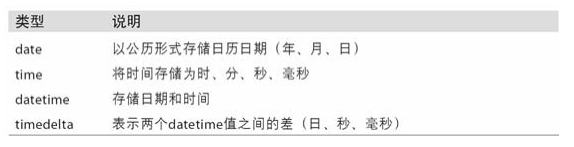

tzinfo 存储时区信息的基本类型
### 字符串和 datetime 的相互转换
利用 str 或 strftime 方法（传入一个格式化字符串），datetime 对象和
pandas 的 Timestamp 对象（稍后就会介绍）可以被格式化为字符串：

In [13]:
stamp = datetime(2011, 1, 3)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

表 11-2 列出了全部的格式化编码。
表 11-2 datetime 格式定义（兼容 ISO C89）

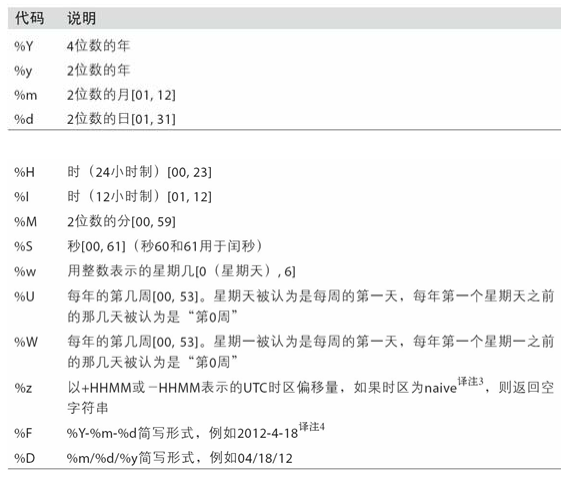

datetime.strptime 可以用这些格式化编码将字符串转换为日期：

In [16]:
value = '2011-01-03'

In [17]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs = ['7/6/2011', '8/6/2011']

In [19]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datetime.strptime 是通过已知格式进行日期解析的最佳方式。但是每次都要
编写格式定义是很麻烦的事情，尤其是对于一些常见的日期格式。这种情况
下，你可以用 dateutil 这个第三方包中的 parser.parse 方法（pandas 中已经
自动安装好了）：

In [20]:
from dateutil.parser import parse

In [21]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

dateutil 可以解析几乎所有人类能够理解的日期表示形式：

In [22]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

在国际通用的格式中，日出现在月的前面很普遍，传入 dayfirst=True 即可解
决这个问题：

In [23]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas 通常是用于处理成组日期的，不管这些日期是 DataFrame 的轴索引还是
列。to_datetime 方法可以解析多种不同的日期表示形式。对标准日期格式
（如 ISO8601）的解析非常快：

In [24]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [25]:
import pandas as pd
import numpy as np

In [26]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

它还可以处理缺失值（None、空字符串等）：

In [27]:
idx = pd.to_datetime(datestrs + [None])

In [28]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [29]:
idx[2]

NaT

In [30]:
pd.isnull(idx)

array([False, False,  True])

NaT（Not a Time）是 pandas 中时间戳数据的 null 值。

注意：dateutil.parser 是一个实用但不完美的工具。比如说，它会把一些原
本不是日期的字符串认作是日期（比如"42"会被解析为 2042 年的今天）。

datetime 对象还有一些特定于当前环境（位于不同国家或使用不同语言的系
统）的格式化选项。例如，德语或法语系统所用的月份简写就与英语系统所用
的不同。表 11-3 进行了总结。

表 11-3 特定于当前环境的日期格式

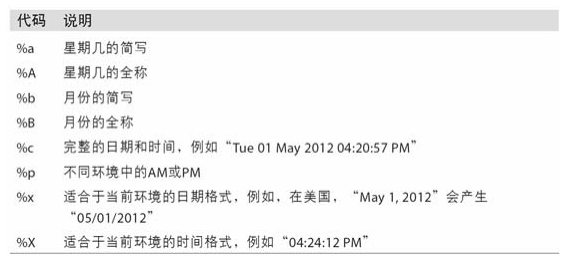

## 11.2 时间序列基础
pandas 最基本的时间序列类型就是以时间戳（通常以 Python 字符串或
datatime 对象表示）为索引的 Series：

In [31]:
from datetime import datetime

In [32]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [33]:
ts = pd.Series(np.random.randn(6), index=dates)

In [34]:
ts

2011-01-02    0.725750
2011-01-05   -0.528390
2011-01-07    0.871896
2011-01-08   -0.254231
2011-01-10    1.437017
2011-01-12   -1.089579
dtype: float64

这些 datetime 对象实际上是被放在一个 DatetimeIndex 中的：

In [35]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

跟其他 Series 一样，不同索引的时间序列之间的算术运算会自动按日期对齐：

In [36]:
ts + ts[::2]

2011-01-02    1.451500
2011-01-05         NaN
2011-01-07    1.743791
2011-01-08         NaN
2011-01-10    2.874035
2011-01-12         NaN
dtype: float64

ts[::2] 是每隔两个取一个。

pandas 用 NumPy 的 datetime64 数据类型以纳秒形式存储时间戳：

In [37]:
ts.index.dtype

dtype('<M8[ns]')

DatetimeIndex 中的各个标量值是 pandas 的 Timestamp 对象：

In [38]:
stamp = ts.index[0]

In [39]:
stamp

Timestamp('2011-01-02 00:00:00')

只要有需要，TimeStamp 可以随时自动转换为 datetime 对象。此外，它还可以
存储频率信息（如果有的话），且知道如何执行时区转换以及其他操作。稍后
将对此进行详细讲解。
### 索引、选取、子集构造
当你根据标签索引选取数据时，时间序列和其它的 pandas.Series 很像：

In [40]:
stamp = ts.index[2]

In [41]:
ts[stamp]

0.871895727642067

还有一种更为方便的用法：传入一个可以被解释为日期的字符串：

In [42]:
ts['1/10/2011']

1.4370174559473217

In [43]:
ts['20110110']

1.4370174559473217

对于较长的时间序列，只需传入“年”或“年月”即可轻松选取数据的切片：

In [44]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))

In [45]:
longer_ts

2000-01-01   -0.942953
2000-01-02   -1.052097
2000-01-03    0.711575
2000-01-04   -0.009769
2000-01-05    0.137261
2000-01-06    0.456541
2000-01-07    0.824122
2000-01-08   -0.779630
2000-01-09   -0.306167
2000-01-10   -0.373417
2000-01-11    1.443529
2000-01-12    1.454892
2000-01-13   -0.185633
2000-01-14    1.711191
2000-01-15    1.294869
2000-01-16    1.218630
2000-01-17   -1.035792
2000-01-18   -1.714924
2000-01-19    0.074221
2000-01-20    0.611522
2000-01-21    0.360913
2000-01-22   -1.799033
2000-01-23    0.605545
2000-01-24    0.405799
2000-01-25   -1.228359
2000-01-26   -2.200391
2000-01-27    0.412637
2000-01-28   -0.524005
2000-01-29   -0.011684
2000-01-30   -1.079612
                ...   
2002-08-28   -1.383450
2002-08-29   -0.367632
2002-08-30    1.389264
2002-08-31   -0.843701
2002-09-01    0.315477
2002-09-02    0.716093
2002-09-03    0.291474
2002-09-04   -0.499764
2002-09-05    0.853557
2002-09-06   -0.935117
2002-09-07    1.182264
2002-09-08   -0.016272
2002-09-09 

这里，字符串“2001”被解释成年，并根据它选取时间区间。指定月也同样奏
效：

In [46]:
longer_ts['2001-05']

2001-05-01    1.247793
2001-05-02   -0.784413
2001-05-03   -0.062382
2001-05-04   -1.581595
2001-05-05   -0.635543
2001-05-06   -1.676231
2001-05-07   -0.510705
2001-05-08    0.655641
2001-05-09    1.168476
2001-05-10    0.926272
2001-05-11   -0.689132
2001-05-12    0.155113
2001-05-13    0.344987
2001-05-14   -0.907412
2001-05-15   -0.618676
2001-05-16    2.026050
2001-05-17   -2.693229
2001-05-18   -0.566051
2001-05-19   -1.806620
2001-05-20    1.001492
2001-05-21    0.258755
2001-05-22   -3.284026
2001-05-23   -0.207034
2001-05-24    0.549766
2001-05-25   -2.346483
2001-05-26   -1.753020
2001-05-27    0.220953
2001-05-28    0.842354
2001-05-29    0.469332
2001-05-30    0.016414
2001-05-31    0.347700
Freq: D, dtype: float64

In [47]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.871896
2011-01-08   -0.254231
2011-01-10    1.437017
2011-01-12   -1.089579
dtype: float64

由于大部分时间序列数据都是按照时间先后排序的，因此你也可以用不存在于
该时间序列中的时间戳对其进行切片（即范围查询）：

In [48]:
ts

2011-01-02    0.725750
2011-01-05   -0.528390
2011-01-07    0.871896
2011-01-08   -0.254231
2011-01-10    1.437017
2011-01-12   -1.089579
dtype: float64

In [49]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.871896
2011-01-08   -0.254231
2011-01-10    1.437017
dtype: float64

跟之前一样，你可以传入字符串日期、datetime 或 Timestamp。注意，这样切
片所产生的是源时间序列的视图，跟 NumPy 数组的切片运算是一样的。

这意味着，没有数据被复制，对切片进行修改会反映到原始数据上。

此外，还有一个等价的实例方法也可以截取两个日期之间 TimeSeries：

In [50]:
ts.truncate(after='1/9/2011')

2011-01-02    0.725750
2011-01-05   -0.528390
2011-01-07    0.871896
2011-01-08   -0.254231
dtype: float64

面这些操作对 DataFrame 也有效。例如，对 DataFrame 的行进行索引：

In [51]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [52]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [53]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,1.840461,-0.486142,-1.347669,-0.988358
2001-05-09,0.343205,0.340819,0.358012,1.554652
2001-05-16,-0.381117,0.477482,0.428400,-0.766620
2001-05-23,-0.277779,-0.933389,-0.032869,-0.044190
2001-05-30,0.489463,1.722335,-1.022555,0.383754


### 带有重复索引的时间序列
在某些应用场景中，可能会存在多个观测数据落在同一个时间点上的情况。下
面就是一个例子：

In [54]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])

In [55]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [56]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

通过检查索引的 is_unique 属性，我们就可以知道它是不是唯一的：

In [57]:
dup_ts.index.is_unique

False

对这个时间序列进行索引，要么产生标量值，要么产生切片，具体要看所选的
时间点是否重复：

In [58]:
dup_ts['1/3/2000'] # not duplicated

4

In [59]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

假设你想要对具有非唯一时间戳的数据进行聚合。一个办法是使用 groupby，
并传入 level=0：

In [60]:
grouped = dup_ts.groupby(level=0)

In [61]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [62]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 日期的范围、频率以及移动
pandas 中的原生时间序列一般被认为是不规则的，也就是说，它们没有固定的
频率。对于大部分应用程序而言，这是无所谓的。但是，它常常需要以某种相
对固定的频率进行分析，比如每日、每月、每 15 分钟等（这样自然会在时间序
列中引入缺失值）。幸运的是，pandas 有一整套标准时间序列频率以及用于重
采样、频率推断、生成固定频率日期范围的工具。例如，我们可以将之前那个
时间序列转换为一个具有固定频率（每日）的时间序列，只需调用 resample 即
可：

In [63]:
ts

2011-01-02    0.725750
2011-01-05   -0.528390
2011-01-07    0.871896
2011-01-08   -0.254231
2011-01-10    1.437017
2011-01-12   -1.089579
dtype: float64

In [64]:
resampler = ts.resample('D')

字符串“D”是每天的意思。
频率的转换（或重采样）是一个比较大的主题，稍后将专门用一节来进行讨论
（11.6 小节）。这里，我将告诉你如何使用基本的频率和它的倍数。
### 生成日期范围
虽然我之前用的时候没有明说，但你可能已经猜到 pandas.date_range 可用于
根据指定的频率生成指定长度的 DatetimeIndex：

In [65]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [66]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

默认情况下，date_range 会产生按天计算的时间点。如果只传入起始或结束日
期，那就还得传入一个表示一段时间的数字：

In [67]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [68]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

起始和结束日期定义了日期索引的严格边界。例如，如果你想要生成一个由每
月最后一个工作日组成的日期索引，可以传入"BM"频率（表示 business end
of month，表 11-4 是频率列表），这样就只会包含时间间隔内（或刚好在边界
上的）符合频率要求的日期：

In [69]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

表 11-4 基本的时间序列频率（不完整）

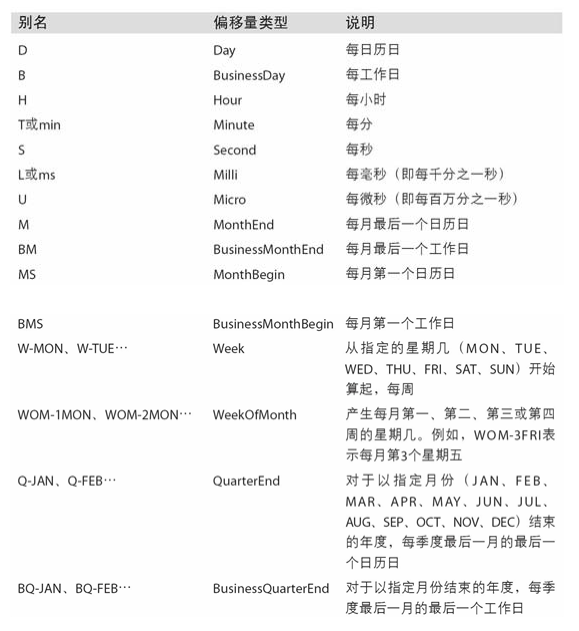

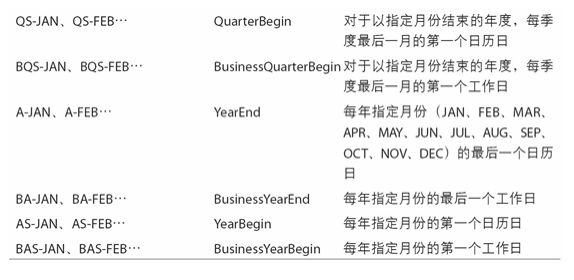

date_range 默认会保留起始和结束时间戳的时间信息（如果有的话）：

In [70]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

有时，虽然起始和结束日期带有时间信息，但你希望产生一组被规范化
（normalize）到午夜的时间戳。normalize 选项即可实现该功能：

In [71]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 频率和日期偏移量
pandas 中的频率是由一个基础频率（base frequency）和一个乘数组成的。基
础频率通常以一个字符串别名表示，比如"M"表示每月，"H"表示每小时。对于
每个基础频率，都有一个被称为日期偏移量（date offset）的对象与之对应。
例如，按小时计算的频率可以用 Hour 类表示：

In [72]:
from pandas.tseries.offsets import Hour, Minute

In [73]:
hour = Hour()

In [74]:
hour

<Hour>

传入一个整数即可定义偏移量的倍数：

In [75]:
four_hours = Hour(4)

In [76]:
four_hours

<4 * Hours>

一般来说，无需明确创建这样的对象，只需使用诸如"H"或"4H"这样的字符串别
名即可。在基础频率前面放上一个整数即可创建倍数：

In [77]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

大部分偏移量对象都可通过加法进行连接：

In [78]:
Hour(2) + Minute(30)

<150 * Minutes>

同理，你也可以传入频率字符串（如"2h30min"），这种字符串可以被高效地解
析为等效的表达式：

In [79]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

有些频率所描述的时间点并不是均匀分隔的。例如，"M"（日历月末）和"BM"
（每月最后一个工作日）就取决于每月的天数，对于后者，还要考虑月末是不
是周末。由于没有更好的术语，我将这些称为锚点偏移量（anchored
offset）。
表 11-4 列出了 pandas 中的频率代码和日期偏移量类。
笔记：用户可以根据实际需求自定义一些频率类以便提供 pandas 所没有的日期
逻辑，但具体的细节超出了本书的范围。
表 11-4 时间序列的基础频率

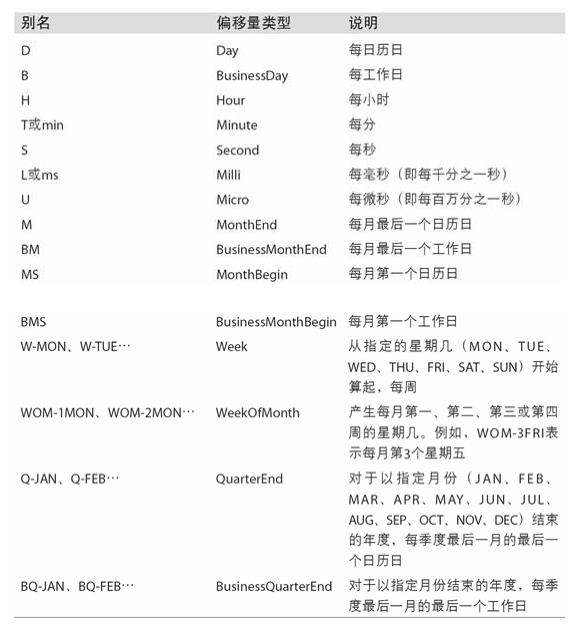

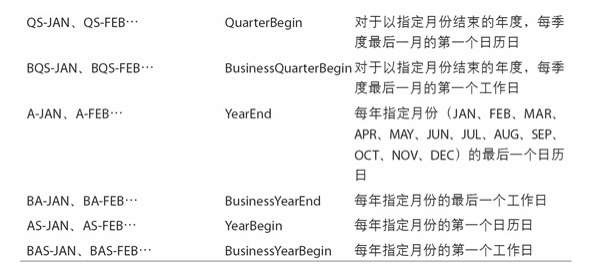

### WOM 日期
WOM（Week Of Month）是一种非常实用的频率类，它以 WOM 开头。它使你能获
得诸如“每月第 3 个星期五”之类的日期：

In [80]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [81]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 移动（超前和滞后）数据
移动（shifting）指的是沿着时间轴将数据前移或后移。Series 和 DataFrame
都有一个 shift 方法用于执行单纯的前移或后移操作，保持索引不变：

In [5]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [6]:
ts

2000-01-31   -0.180721
2000-02-29   -0.351517
2000-03-31   -1.437884
2000-04-30   -0.238292
Freq: M, dtype: float64

In [7]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.180721
2000-04-30   -0.351517
Freq: M, dtype: float64

In [8]:
ts.shift(-2)

2000-01-31   -1.437884
2000-02-29   -0.238292
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

当我们这样进行移动时，就会在时间序列的前面或后面产生缺失数据。
shift 通常用于计算一个时间序列或多个时间序列（如 DataFrame 的列）中的
百分比变化。可以这样表达：

由于单纯的移位操作不会修改索引，所以部分数据会被丢弃。因此，如果频率
已知，则可以将其传给 shift 以便实现对时间戳进行位移而不是对数据进行简
单位移：

In [9]:
ts.shift(2, freq='M')

2000-03-31   -0.180721
2000-04-30   -0.351517
2000-05-31   -1.437884
2000-06-30   -0.238292
Freq: M, dtype: float64

这里还可以使用其他频率，于是你就能非常灵活地对数据进行超前和滞后处理
了：

In [10]:
ts.shift(3, freq='D')

2000-02-03   -0.180721
2000-03-03   -0.351517
2000-04-03   -1.437884
2000-05-03   -0.238292
dtype: float64

In [11]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.180721
2000-02-29 01:30:00   -0.351517
2000-03-31 01:30:00   -1.437884
2000-04-30 01:30:00   -0.238292
Freq: M, dtype: float64

### 通过偏移量对日期进行位移
pandas 的日期偏移量还可以用在 datetime 或 Timestamp 对象上：

In [12]:
from pandas.tseries.offsets import Day, MonthEnd

In [15]:
now = datetime(2011, 11, 17)

In [16]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

如果加的是锚点偏移量（比如 MonthEnd），第一次增量会将原日期向前滚动到
符合频率规则的下一个日期：

In [17]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [18]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

通过锚点偏移量的 rollforward 和 rollback 方法，可明确地将日期向前或向后
“滚动”：

In [19]:
offset = MonthEnd()

In [20]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [21]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

日期偏移量还有一个巧妙的用法，即结合 groupby 使用这两个“滚动”方法：

In [22]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [23]:
ts

2000-01-15    1.318109
2000-01-19   -0.043286
2000-01-23   -0.655091
2000-01-27   -0.784448
2000-01-31    0.279323
2000-02-04   -1.784305
2000-02-08    0.957568
2000-02-12   -0.842769
2000-02-16   -1.033117
2000-02-20   -0.751714
2000-02-24    0.878663
2000-02-28    1.505480
2000-03-03   -0.158632
2000-03-07   -0.971551
2000-03-11   -0.508967
2000-03-15    1.211283
2000-03-19   -0.084135
2000-03-23   -0.836109
2000-03-27   -0.098940
2000-03-31    0.425772
Freq: 4D, dtype: float64

In [24]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.022922
2000-02-29   -0.152885
2000-03-31   -0.127660
dtype: float64

当然，更简单、更快速地实现该功能的办法是使用 resample（11.6 小节将对此
进行详细介绍）：

In [25]:
ts.resample('M').mean()

2000-01-31    0.022922
2000-02-29   -0.152885
2000-03-31   -0.127660
Freq: M, dtype: float64

## 11.4 时区处理
时间序列处理工作中最让人不爽的就是对时区的处理。许多人都选择以协调世
界时（UTC，它是格林尼治标准时间（Greenwich Mean Time）的接替者，目前
已经是国际标准了）来处理时间序列。时区是以 UTC 偏移量的形式表示的。例
如，夏令时期间，纽约比 UTC 慢 4 小时，而在全年其他时间则比 UTC 慢 5 小
时。

在 Python 中，时区信息来自第三方库 pytz，它使 Python 可以使用 Olson 数据
库（汇编了世界时区信息）。这对历史数据非常重要，这是因为由于各地政府
的各种突发奇想，夏令时转变日期（甚至 UTC 偏移量）已经发生过多次改变
了。就拿美国来说，DST 转变时间自 1900 年以来就改变过多次！

有关 pytz 库的更多信息，请查阅其文档。就本书而言，由于 pandas 包装了
pytz 的功能，因此你可以不用记忆其 API，只要记得时区的名称即可。时区名
可以在 shell 中看到，也可以通过文档查看：

In [26]:
import pytz

In [27]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

要从 pytz 中获取时区对象，使用 pytz.timezone 即可：

In [28]:
tz = pytz.timezone('America/New_York')

In [29]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

pandas 中的方法既可以接受时区名也可以接受这些对象。
### 时区本地化和转换
默认情况下，pandas 中的时间序列是单纯的（naive）时区。看看下面这个时
间序列：

In [30]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [31]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [32]:
ts

2012-03-09 09:30:00   -0.618883
2012-03-10 09:30:00    0.180145
2012-03-11 09:30:00    1.073545
2012-03-12 09:30:00   -1.278745
2012-03-13 09:30:00   -1.255112
2012-03-14 09:30:00   -0.379133
Freq: D, dtype: float64

其索引的 tz 字段为 None：

In [33]:
print(ts.index.tz)

None


可以用时区集生成日期范围：

In [34]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

从单纯到本地化的转换是通过 tz_localize 方法处理的：

In [35]:
ts

2012-03-09 09:30:00   -0.618883
2012-03-10 09:30:00    0.180145
2012-03-11 09:30:00    1.073545
2012-03-12 09:30:00   -1.278745
2012-03-13 09:30:00   -1.255112
2012-03-14 09:30:00   -0.379133
Freq: D, dtype: float64

In [36]:
ts_utc = ts.tz_localize('UTC')

In [37]:
ts_utc

2012-03-09 09:30:00+00:00   -0.618883
2012-03-10 09:30:00+00:00    0.180145
2012-03-11 09:30:00+00:00    1.073545
2012-03-12 09:30:00+00:00   -1.278745
2012-03-13 09:30:00+00:00   -1.255112
2012-03-14 09:30:00+00:00   -0.379133
Freq: D, dtype: float64

In [38]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

一旦时间序列被本地化到某个特定时区，就可以用 tz_convert 将其转换到别的
时区了：

In [39]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.618883
2012-03-10 04:30:00-05:00    0.180145
2012-03-11 05:30:00-04:00    1.073545
2012-03-12 05:30:00-04:00   -1.278745
2012-03-13 05:30:00-04:00   -1.255112
2012-03-14 05:30:00-04:00   -0.379133
Freq: D, dtype: float64

对于上面这种时间序列（它跨越了美国东部时区的夏令时转变期），我们可以
将其本地化到 EST，然后转换为 UTC 或柏林时间：

In [40]:
ts_eastern = ts.tz_localize('America/New_York')

In [41]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.618883
2012-03-10 14:30:00+00:00    0.180145
2012-03-11 13:30:00+00:00    1.073545
2012-03-12 13:30:00+00:00   -1.278745
2012-03-13 13:30:00+00:00   -1.255112
2012-03-14 13:30:00+00:00   -0.379133
Freq: D, dtype: float64

In [42]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.618883
2012-03-10 15:30:00+01:00    0.180145
2012-03-11 14:30:00+01:00    1.073545
2012-03-12 14:30:00+01:00   -1.278745
2012-03-13 14:30:00+01:00   -1.255112
2012-03-14 14:30:00+01:00   -0.379133
Freq: D, dtype: float64

tz_localize 和 tz_convert 也是 DatetimeIndex 的实例方法：

In [43]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

注意：对单纯时间戳的本地化操作还会检查夏令时转变期附近容易混淆或不存
在的时间。

### 操作时区意识型 Timestamp 对象
跟时间序列和日期范围差不多，独立的 Timestamp 对象也能被从单纯型
（naive）本地化为时区意识型（time zone-aware），并从一个时区转换到另
一个时区：

In [44]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [45]:
stamp_utc = stamp.tz_localize('utc')

In [46]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

在创建 Timestamp 时，还可以传入一个时区信息：

In [47]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [48]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

时区意识型 Timestamp 对象在内部保存了一个 UTC 时间戳值（自 UNIX 纪元
（1970 年 1 月 1 日）算起的纳秒数）。这个 UTC 值在时区转换过程中是不会发
生变化的：

In [49]:
stamp_utc.value

1299902400000000000

In [50]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

当使用 pandas 的 DateOffset 对象执行时间算术运算时，运算过程会自动关注
是否存在夏令时转变期。这里，我们创建了在 DST 转变之前的时间戳。首先，
来看夏令时转变前的 30 分钟：

In [51]:
from pandas.tseries.offsets import Hour

In [52]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [53]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [54]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

然后，夏令时转变前 90 分钟：

In [55]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [56]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [57]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 不同时区之间的运算
如果两个时间序列的时区不同，在将它们合并到一起时，最终结果就会是
UTC。由于时间戳其实是以 UTC 存储的，所以这是一个很简单的运算，并不需要
发生任何转换：

In [58]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [59]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [60]:
ts

2012-03-07 09:30:00    1.470793
2012-03-08 09:30:00   -1.505182
2012-03-09 09:30:00    2.330846
2012-03-12 09:30:00    1.540008
2012-03-13 09:30:00   -0.209943
2012-03-14 09:30:00   -0.141318
2012-03-15 09:30:00    0.838143
2012-03-16 09:30:00   -0.194960
2012-03-19 09:30:00   -0.401106
2012-03-20 09:30:00   -0.636664
Freq: B, dtype: float64

In [61]:
ts1 = ts[:7].tz_localize('Europe/London')

In [62]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [63]:
result = ts1 + ts2

In [64]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 11.5 时期及其算术运算
时期（period）表示的是时间区间，比如数日、数月、数季、数年等。Period
类所表示的就是这种数据类型，其构造函数需要用到一个字符串或整数，以及
表 11-4 中的频率：

In [65]:
p = pd.Period(2007, freq='A-DEC')

In [66]:
p

Period('2007', 'A-DEC')

这里，这个 Period 对象表示的是从 2007 年 1 月 1 日到 2007 年 12 月 31 日之间
的整段时间。只需对 Period 对象加上或减去一个整数即可达到根据其频率进行
位移的效果：

In [67]:
p + 5

Period('2012', 'A-DEC')

In [68]:
p - 2

Period('2005', 'A-DEC')

如果两个 Period 对象拥有相同的频率，则它们的差就是它们之间的单位数量：

In [69]:
pd.Period('2014', freq='A-DEC') - p

7

period_range 函数可用于创建规则的时期范围：

rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [70]:
rng

DatetimeIndex(['2012-03-07 09:30:00', '2012-03-08 09:30:00',
               '2012-03-09 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-19 09:30:00', '2012-03-20 09:30:00'],
              dtype='datetime64[ns]', freq='B')

PeriodIndex 类保存了一组 Period，它可以在任何 pandas 数据结构中被用作轴
索引：

In [73]:
pd.Series(np.random.randn(10), index=rng)

2012-03-07 09:30:00    0.247546
2012-03-08 09:30:00   -0.771881
2012-03-09 09:30:00    0.166121
2012-03-12 09:30:00   -0.977481
2012-03-13 09:30:00   -0.028048
2012-03-14 09:30:00    0.838039
2012-03-15 09:30:00   -0.125745
2012-03-16 09:30:00   -0.313966
2012-03-19 09:30:00   -0.980942
2012-03-20 09:30:00   -1.551998
Freq: B, dtype: float64

如果你有一个字符串数组，你也可以使用 PeriodIndex 类：

In [74]:
values = ['2001Q3', '2002Q2', '2003Q1']

In [75]:
index = pd.PeriodIndex(values, freq='Q-DEC')

In [76]:
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 时期的频率转换
Period 和 PeriodIndex 对象都可以通过其 asfreq 方法被转换成别的频率。假
设我们有一个年度时期，希望将其转换为当年年初或年末的一个月度时期。该
任务非常简单：

In [77]:
p = pd.Period('2007', freq='A-DEC')

In [78]:
p

Period('2007', 'A-DEC')

In [79]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [80]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

你可以将 Period('2007','A-DEC')看做一个被划分为多个月度时期的时间段中
的游标。图 11-1 对此进行了说明。对于一个不以 12 月结束的财政年度，月度
子时期的归属情况就不一样了：

In [81]:
p = pd.Period('2007', freq='A-JUN')

In [82]:
p

Period('2007', 'A-JUN')

In [83]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [84]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

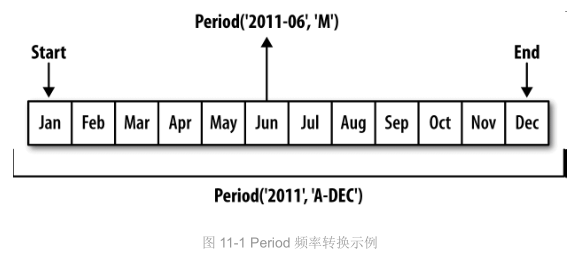

在将高频率转换为低频率时，超时期（superperiod）是由子时期
（subperiod）所属的位置决定的。例如，在 A-JUN 频率中，月份“2007 年 8
月”实际上是属于周期“2008 年”的：

In [85]:
p = pd.Period('Aug-2007', 'M')

In [86]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

完整的 PeriodIndex 或 TimeSeries 的频率转换方式也是如此：

In [87]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [88]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [89]:
ts

2006   -0.305749
2007    0.235549
2008   -0.528285
2009    2.037796
Freq: A-DEC, dtype: float64

In [90]:
ts.asfreq('M', how='start')

2006-01   -0.305749
2007-01    0.235549
2008-01   -0.528285
2009-01    2.037796
Freq: M, dtype: float64

这里，根据年度时期的第一个月，每年的时期被取代为每月的时期。如果我们
想要每年的最后一个工作日，我们可以使用“B”频率，并指明想要该时期的末
尾：

In [91]:
ts.asfreq('B', how='end')

2006-12-29   -0.305749
2007-12-31    0.235549
2008-12-31   -0.528285
2009-12-31    2.037796
Freq: B, dtype: float64

### 按季度计算的时期频率
季度型数据在会计、金融等领域中很常见。许多季度型数据都会涉及“财年
末”的概念，通常是一年 12 个月中某月的最后一个日历日或工作日。就这一点
来说，时期"2012Q4"根据财年末的不同会有不同的含义。pandas 支持 12 种可
能的季度型频率，即 Q-JAN 到 Q-DEC

In [92]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [93]:
p

Period('2012Q4', 'Q-JAN')

在以 1 月结束的财年中，2012Q4 是从 11 月到 1 月（将其转换为日型频率就明
白了）。图 11-2 对此进行了说明：

In [94]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [95]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

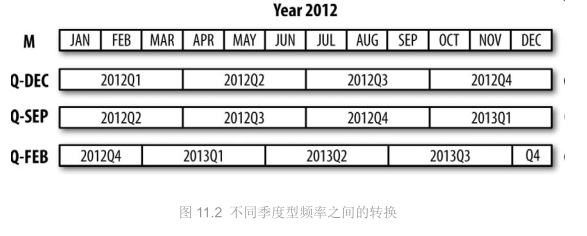

因此，Period 之间的算术运算会非常简单。例如，要获取该季度倒数第二个工
作日下午 4 点的时间戳，你可以这样：

In [96]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [97]:
p4pm

Period('2012-01-30 16:00', 'T')

In [98]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

period_range 可用于生成季度型范围。季度型范围的算术运算也跟上面是一样
的：

In [99]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [100]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [101]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [102]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [103]:
ts.index = new_rng.to_timestamp()

In [104]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 将 Timestamp 转换为 Period（及其反向过程）
通过使用 to_period 方法，可以将由时间戳索引的 Series 和 DataFrame 对象转
换为以时期索引：

In [105]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [106]:
ts = pd.Series(np.random.randn(3), index=rng)

In [107]:
ts

2000-01-31    0.092956
2000-02-29    1.100263
2000-03-31   -0.170331
Freq: M, dtype: float64

In [108]:
pts = ts.to_period()

In [109]:
pts

2000-01    0.092956
2000-02    1.100263
2000-03   -0.170331
Freq: M, dtype: float64

由于时期指的是非重叠时间区间，因此对于给定的频率，一个时间戳只能属于
一个时期。新 PeriodIndex 的频率默认是从时间戳推断而来的，你也可以指定
任何别的频率。结果中允许存在重复时期：

In [110]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [111]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [112]:
ts2

2000-01-29   -0.501522
2000-01-30   -2.088624
2000-01-31    1.469750
2000-02-01   -0.669532
2000-02-02    0.255585
2000-02-03    0.457088
Freq: D, dtype: float64

In [113]:
ts2.to_period('M')

2000-01   -0.501522
2000-01   -2.088624
2000-01    1.469750
2000-02   -0.669532
2000-02    0.255585
2000-02    0.457088
Freq: M, dtype: float64

要转换回时间戳，使用 to_timestamp 即可：

In [114]:
pts = ts2.to_period()

In [115]:
pts

2000-01-29   -0.501522
2000-01-30   -2.088624
2000-01-31    1.469750
2000-02-01   -0.669532
2000-02-02    0.255585
2000-02-03    0.457088
Freq: D, dtype: float64

In [116]:
pts.to_timestamp(how='end')

2000-01-29   -0.501522
2000-01-30   -2.088624
2000-01-31    1.469750
2000-02-01   -0.669532
2000-02-02    0.255585
2000-02-03    0.457088
Freq: D, dtype: float64

### 通过数组创建 PeriodIndex
固定频率的数据集通常会将时间信息分开存放在多个列中。例如，在下面这个
宏观经济数据集中，年度和季度就分别存放在不同的列中：

In [117]:
data = pd.read_csv('examples/macrodata.csv')

In [118]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [119]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [120]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

通过通过将这些数组以及一个频率传入 PeriodIndex，就可以将它们合并成
DataFrame 的一个索引：

In [121]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [122]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [123]:
data.index = index

In [124]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 重采样及频率转换
重采样（resampling）指的是将时间序列从一个频率转换到另一个频率的处理
过程。将高频率数据聚合到低频率称为降采样（downsampling），而将低频率
数据转换到高频率则称为升采样（upsampling）。并不是所有的重采样都能被
划分到这两个大类中。例如，将 W-WED（每周三）转换为 W-FRI 既不是降采样
也不是升采样。

pandas 对象都带有一个 resample 方法，它是各种频率转换工作的主力函数。
resample 有一个类似于 groupby 的 API，调用 resample 可以分组数据，然后会
调用一个聚合函数：

In [125]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [126]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [127]:
ts

2000-01-01    0.071195
2000-01-02   -0.247201
2000-01-03   -1.217495
2000-01-04   -0.408914
2000-01-05   -1.126303
2000-01-06    0.678779
2000-01-07   -2.388246
2000-01-08    1.059811
2000-01-09   -2.208812
2000-01-10    0.229396
2000-01-11   -0.353610
2000-01-12   -0.388349
2000-01-13    0.299042
2000-01-14   -0.973906
2000-01-15   -1.286623
2000-01-16    0.413458
2000-01-17   -0.501723
2000-01-18    0.540423
2000-01-19    0.116578
2000-01-20   -0.559184
2000-01-21    0.227589
2000-01-22    0.600315
2000-01-23    0.012600
2000-01-24    0.734922
2000-01-25   -0.999836
2000-01-26    1.496230
2000-01-27   -0.406042
2000-01-28   -2.013662
2000-01-29   -0.365412
2000-01-30    1.067883
                ...   
2000-03-11    0.048547
2000-03-12    0.124908
2000-03-13   -0.486308
2000-03-14    0.745802
2000-03-15   -1.362049
2000-03-16   -0.438800
2000-03-17   -0.686315
2000-03-18   -0.613732
2000-03-19   -0.117213
2000-03-20    2.192482
2000-03-21   -0.316081
2000-03-22   -0.402536
2000-03-23 

In [128]:
ts.resample('M').mean()

2000-01-31   -0.222582
2000-02-29   -0.126174
2000-03-31   -0.037114
2000-04-30    0.066597
Freq: M, dtype: float64

In [129]:
ts.resample('M', kind='period').mean()

2000-01   -0.222582
2000-02   -0.126174
2000-03   -0.037114
2000-04    0.066597
Freq: M, dtype: float64

resample 是一个灵活高效的方法，可用于处理非常大的时间序列。我将通过一
系列的示例说明其用法。表 11-5 总结它的一些选项。
表 11-5 resample 方法的参数

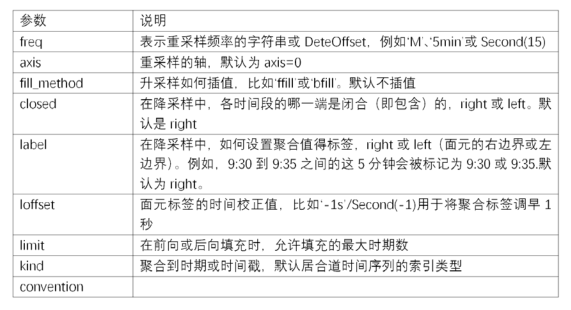

### 降采样
将数据聚合到规律的低频率是一件非常普通的时间序列处理任务。待聚合的数
据不必拥有固定的频率，期望的频率会自动定义聚合的面元边界，这些面元用
于将时间序列拆分为多个片段。例如，要转换到月度频率（'M'或'BM'），数据
需要被划分到多个单月时间段中。各时间段都是半开放的。一个数据点只能属
于一个时间段，所有时间段的并集必须能组成整个时间帧。在用 resample 对数
据进行降采样时，需要考虑两样东西：
-  各区间哪边是闭合的。
-  如何标记各个聚合面元，用区间的开头还是末尾。

为了说明，我们来看一些“1 分钟”数据：

In [130]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [131]:
ts = pd.Series(np.arange(12), index=rng)

In [132]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

假设你想要通过求和的方式将这些数据聚合到“5 分钟”块中：

In [133]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

传入的频率将会以“5 分钟”的增量定义面元边界。默认情况下，面元的右边
界是包含的，因此 00:00 到 00:05 的区间中是包含 00:05 的。传入
closed='left'会让区间以左边界闭合：

In [134]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

如你所见，最终的时间序列是以各面元右边界的时间戳进行标记的。传入
label='right'即可用面元的邮编界对其进行标记：

In [135]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

图 11-3 说明了“1 分钟”数据被转换为“5 分钟”数据的处理过程。

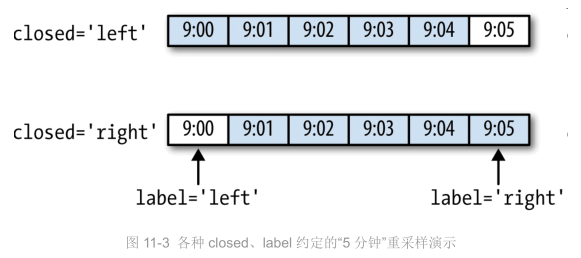

最后，你可能希望对结果索引做一些位移，比如从右边界减去一秒以便更容易
明白该时间戳到底表示的是哪个区间。只需通过 loffset 设置一个字符串或日
期偏移量即可实现这个目的：

In [136]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [137]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

此外，也可以通过调用结果对象的 shift 方法来实现该目的，这样就不需要设
置 loffset 了。
### OHLC 重采样
金融领域中有一种无所不在的时间序列聚合方式，即计算各面元的四个值：第
一个值（open，开盘）、最后一个值（close，收盘）、最大值（high，最高）
以及最小值（low，最低）。传入 how='ohlc'即可得到一个含有这四种聚合值
的 DataFrame。整个过程很高效，只需一次扫描即可计算出结果：

In [138]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 升采样和插值
在将数据从低频率转换到高频率时，就不需要聚合了。我们来看一个带有一些
周型数据的 DataFrame：

In [140]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [141]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.063410,0.265598,1.467327,-0.178126
2000-01-12,-0.696721,2.041248,0.840915,-0.787734


当你对这个数据进行聚合，每组只有一个值，这样就会引入缺失值。我们使用
asfreq 方法转换成高频，不经过聚合：

In [142]:
df_daily = frame.resample('D').asfreq()

In [143]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.063410,0.265598,1.467327,-0.178126
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.696721,2.041248,0.840915,-0.787734


假设你想要用前面的周型值填充“非星期三”。resampling 的填充和插值方式
跟 fillna 和 reindex 的一样：

In [144]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.063410,0.265598,1.467327,-0.178126
2000-01-06,-0.063410,0.265598,1.467327,-0.178126
2000-01-07,-0.063410,0.265598,1.467327,-0.178126
2000-01-08,-0.063410,0.265598,1.467327,-0.178126
2000-01-09,-0.063410,0.265598,1.467327,-0.178126
2000-01-10,-0.063410,0.265598,1.467327,-0.178126
2000-01-11,-0.063410,0.265598,1.467327,-0.178126
2000-01-12,-0.696721,2.041248,0.840915,-0.787734


同样，这里也可以只填充指定的时期数（目的是限制前面的观测值的持续使用
距离）：

In [145]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.063410,0.265598,1.467327,-0.178126
2000-01-06,-0.063410,0.265598,1.467327,-0.178126
2000-01-07,-0.063410,0.265598,1.467327,-0.178126
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.696721,2.041248,0.840915,-0.787734


注意，新的日期索引完全没必要跟旧的重叠：

In [146]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.063410,0.265598,1.467327,-0.178126
2000-01-13,-0.696721,2.041248,0.840915,-0.787734


### 通过时期进行重采样
对那些使用时期索引的数据进行重采样与时间戳很像：

In [148]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [149]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-1.464924,1.424847,-0.738433,1.429426
2000-02,0.012256,-0.084281,0.720140,-1.261718
2000-03,-0.159340,-0.152148,2.484484,0.454389
2000-04,-2.000648,0.726957,1.245472,1.472410
2000-05,-0.682602,-2.353368,-0.855777,-2.514626


In [150]:
annual_frame = frame.resample('A-DEC').mean()

In [151]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.628047,-0.008791,0.006134,-0.018772
2001,-0.584339,0.296170,-0.124830,0.247049


升采样要稍微麻烦一些，因为你必须决定在新频率中各区间的哪端用于放置原
来的值，就像 asfreq 方法那样。convention 参数默认为'end'，可设置为
'start'：

In [152]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.628047,-0.008791,0.006134,-0.018772
2000Q2,-0.628047,-0.008791,0.006134,-0.018772
2000Q3,-0.628047,-0.008791,0.006134,-0.018772
2000Q4,-0.628047,-0.008791,0.006134,-0.018772
2001Q1,-0.584339,0.296170,-0.124830,0.247049
2001Q2,-0.584339,0.296170,-0.124830,0.247049
2001Q3,-0.584339,0.296170,-0.124830,0.247049
2001Q4,-0.584339,0.296170,-0.124830,0.247049


In [153]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.628047,-0.008791,0.006134,-0.018772
2001Q1,-0.628047,-0.008791,0.006134,-0.018772
2001Q2,-0.628047,-0.008791,0.006134,-0.018772
2001Q3,-0.628047,-0.008791,0.006134,-0.018772
2001Q4,-0.584339,0.296170,-0.124830,0.247049


由于时期指的是时间区间，所以升采样和降采样的规则就比较严格：
-  在降采样中，目标频率必须是源频率的子时期（subperiod）。
-  在升采样中，目标频率必须是源频率的超时期（superperiod）。

如果不满足这些条件，就会引发异常。这主要影响的是按季、年、周计算的频
率。例如，由 Q-MAR 定义的时间区间只能升采样为 A-MAR、A-JUN、A-SEP、A-
DEC 等：

In [154]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.628047,-0.008791,0.006134,-0.018772
2001Q1,-0.628047,-0.008791,0.006134,-0.018772
2001Q2,-0.628047,-0.008791,0.006134,-0.018772
2001Q3,-0.628047,-0.008791,0.006134,-0.018772
2001Q4,-0.584339,0.296170,-0.124830,0.247049
2002Q1,-0.584339,0.296170,-0.124830,0.247049
2002Q2,-0.584339,0.296170,-0.124830,0.247049
2002Q3,-0.584339,0.296170,-0.124830,0.247049


## 11.7 移动窗口函数
在移动窗口（可以带有指数衰减权数）上计算的各种统计函数也是一类常见于
时间序列的数组变换。这样可以圆滑噪音数据或断裂数据。我将它们称为移动
窗口函数（moving window function），其中还包括那些窗口不定长的函数
（如指数加权移动平均）。跟其他统计函数一样，移动窗口函数也会自动排除
缺失值。

开始之前，我们加载一些时间序列数据，将其重采样为工作日频率：

In [155]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [156]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [157]:
close_px = close_px.resample('B').ffill()

现在引入 rolling 运算符，它与 resample 和 groupby 很像。可以在
TimeSeries 或 DataFrame 以及一个 window（表示期数，见图 11-4）上调用
它：

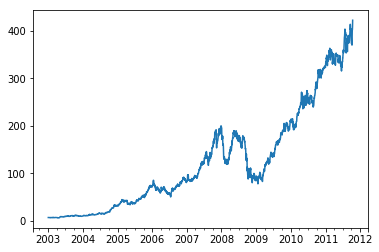

In [163]:
close_px.AAPL.plot()

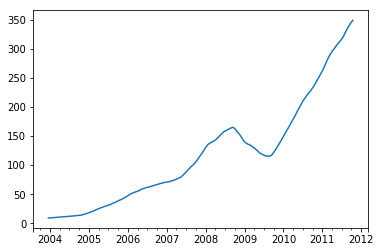

In [164]:
close_px.AAPL.rolling(250).mean().plot()

表达式 rolling(250)与 groupby 很像，但不是对其进行分组、创建一个按照
250 天分组的滑动窗口对象。然后，我们就得到了苹果公司股价的 250 天的移
动窗口。

默认情况下，诸如 rolling_mean 这样的函数需要指定数量的非 NA 观测值。可
以修改该行为以解决缺失数据的问题。其实，在时间序列开始处尚不足窗口期
的那些数据就是个特例（见图 11-5）：

In [165]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [166]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

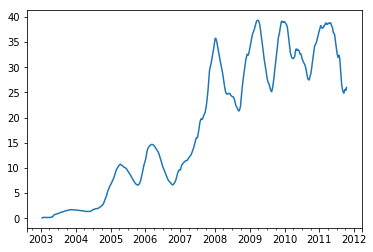

In [167]:
appl_std250.plot()

要计算扩展窗口平均（expanding window mean），可以使用 expanding 而不是
rolling。“扩展”意味着，从时间序列的起始处开始窗口，增加窗口直到它超
过所有的序列。apple_std250 时间序列的扩展窗口平均如下所示：

In [168]:
expanding_mean = appl_std250.expanding().mean()

对 DataFrame 调用 rolling_mean（以及与之类似的函数）会将转换应用到所有
的列上（见图 11-6）：

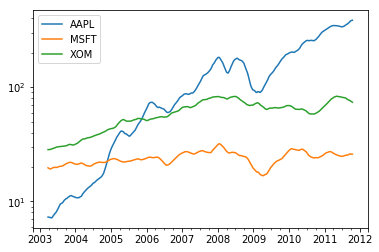

In [169]:
close_px.rolling(60).mean().plot(logy=True)

rolling 函数也可以接受一个指定固定大小时间补偿字符串，而不是一组时
期。这样可以方便处理不规律的时间序列。这些字符串也可以传递给
resample。例如，我们可以计算 20 天的滚动均值，如下所示：

In [170]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


### 指数加权函数
另一种使用固定大小窗口及相等权数观测值的办法是，定义一个衰减因子
（decay factor）常量，以便使近期的观测值拥有更大的权数。衰减因子的定
义方式有很多，比较流行的是使用时间间隔（span），它可以使结果兼容于窗
口大小等于时间间隔的简单移动窗口（simple moving window）函数。

由于指数加权统计会赋予近期的观测值更大的权数，因此相对于等权统计，它
能“适应”更快的变化。

除了 rolling 和 expanding，pandas 还有 ewm 运算符。下面这个例子对比了苹
果公司股价的 60 日移动平均和 span=60 的指数加权移动平均（如图 11-7 所
示）：

In [171]:
aapl_px = close_px.AAPL['2006':'2007']

In [172]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [173]:
ewma60 = aapl_px.ewm(span=30).mean()

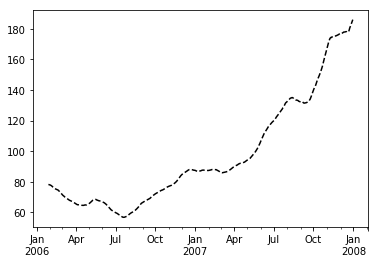

In [174]:
ma60.plot(style='k--', label='Simple MA')

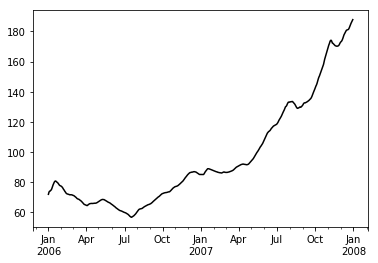

In [175]:
ewma60.plot(style='k-', label='EW MA')

In [176]:
plt.legend()

NameError: name 'plt' is not defined

### 二元移动窗口函数
有些统计运算（如相关系数和协方差）需要在两个时间序列上执行。例如，金
融分析师常常对某只股票对某个参考指数（如标准普尔 500 指数）的相关系数
感兴趣。要进行说明，我们先计算我们感兴趣的时间序列的百分数变化：

In [177]:
spx_px = close_px_all['SPX']

In [178]:
spx_rets = spx_px.pct_change()

In [179]:
returns = close_px.pct_change()

调用 rolling 之后，corr 聚合函数开始计算与 spx_rets 滚动相关系数（结果
见图 11-8）：

In [180]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

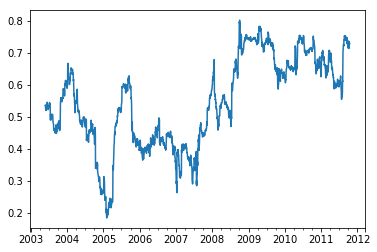

In [181]:
corr.plot()

假设你想要一次性计算多只股票与标准普尔 500 指数的相关系数。虽然编写一
个循环并新建一个 DataFrame 不是什么难事，但比较啰嗦。其实，只需传入一
个 TimeSeries 和一个 DataFrame，rolling_corr 就会自动计算 TimeSeries
（本例中就是 spx_rets）与 DataFrame 各列的相关系数。结果如图 11-9 所
示：

In [182]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)

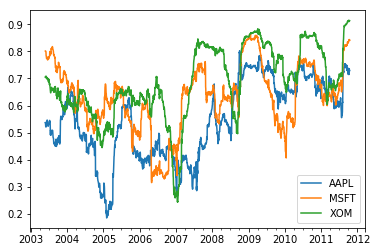

In [184]:
corr.plot()

### 用户定义的移动窗口函数
rolling_apply 函数使你能够在移动窗口上应用自己设计的数组函数。唯一要
求的就是：该函数要能从数组的各个片段中产生单个值（即约简）。比如说，
当我们用 rolling(...).quantile(q)计算样本分位数时，可能对样本中特定值
的百分等级感兴趣。scipy.stats.percentileofscore 函数就能达到这个目的
（结果见图 11-10）：

In [185]:
from scipy.stats import percentileofscore

In [186]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [187]:
result = returns.AAPL.rolling(250).apply(score_at_2percent)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


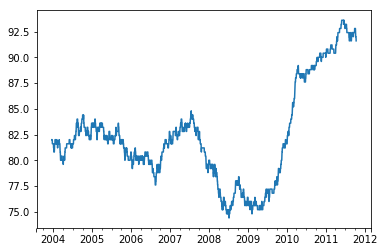

In [188]:
result.plot()

如果你没安装 SciPy，可以使用 conda 或 pip 安装。
## 11.8  总结
与前面章节接触的数据相比，时间序列数据要求不同类型的分析和数据转换工
具。

在接下来的章节中，我们将学习一些高级的 pandas 方法和如何开始使用建模
库 statsmodels 和 scikit-learn。